In [1]:
import os
import ast

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.patches as mpatches

import pickle

import umap

import metaspace
from metaspace import SMInstance

from viz import get_ds_list, get_ion_imgs, ion_cluster, plot_ion_imgs, label_point, imshow_ions, cluster_viz
from metadata import get_meta_df

plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['figure.dpi'] = 300

/home/geng/my-conda-envs/DomEnv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-11-24 13:20:18.431881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load the data for the different window sizes. Note, that we varied the window size in the ion img, not the text window.
# This is all random walk data. 
df_dict = {}
for i in range(1,7):
    vec_file = f"vectors/vectors_TheoNo2both_TF_RW_w{i}_rw.tsv"
    meta_file = f"vectors/metadata_TheoNo2both_TF_RW_w{i}_rw.tsv"
    vec_df = get_meta_df(vec_file, meta_file= meta_file, embed=True)
    df_dict[f'w{i}'] = vec_df



In [2]:
vec_file = "vectors_37test_rw.tsv"
meta_file = "metadata_37test_rw.tsv"
vec_df = get_meta_df(vec_file, meta_file, embed=True)

In [3]:
vec_df

,ion,formula,adduct,ionFormula,mol_name,super_class,class,sub_class,dataset_ids,encoded_ds,ds_names,single_dataset_id,single_dataset_name,umap_x,umap_y
0,C15H22N2O4+H+,C15H22N2O4,+H,C15H23N2O4,Leucyl-Tyrosine,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues","[2017-08-03_15h09m06s, 2017-08-03_15h09m51s]","[0, 0, 0, 1, 1, 0]","[Servier_Ctrl_mouse_wb_median_plane_chca, Serv...",Multiple Datasets,Multiple Datasets,6.920766,-7.464800
1,C10H11NO2+Na+,C10H11NO2,+Na,C10H11NO2Na,"N,N-dimethylindoliumolate",Organoheterocyclic compounds,Indoles and derivatives,Hydroxyindoles,[2017-08-03_15h09m06s],"[0, 0, 0, 1, 0, 0]",[Servier_Ctrl_mouse_wb_median_plane_chca],2017-08-03_15h09m06s,Servier_Ctrl_mouse_wb_median_plane_chca,7.450382,-4.939478
2,C8H20NO6P+H+,C8H20NO6P,+H,C8H21NO6P,Glycerophosphocholine,Lipids and lipid-like molecules,Glycerophospholipids,Glycerophosphocholines,"[2017-08-03_15h09m06s, 2017-08-11_07h59m58s, 2...","[1, 1, 1, 1, 1, 1]","[Servier_Ctrl_mouse_wb_median_plane_chca, Serv...",Multiple Datasets,Multiple Datasets,6.781976,-8.612270
3,C35H66O4+H+,C35H66O4,+H,C35H67O4,Artemoin D,Lipids and lipid-like molecules,Fatty Acyls,Fatty alcohols,"[2017-08-03_15h09m06s, 2017-08-11_07h59m58s, 2...","[0, 1, 1, 1, 0, 1]","[Servier_Ctrl_mouse_wb_median_plane_chca, Serv...",Multiple Datasets,Multiple Datasets,6.863843,-6.792717
4,C7H15NO3+K+,C7H15NO3,+K,C7H15NO3K,Malonyl-Carnitin,Organic nitrogen compounds,Organonitrogen compounds,Quaternary ammonium salts,"[2017-08-03_15h09m06s, 2017-08-03_15h09m51s]","[0, 0, 0, 1, 1, 0]","[Servier_Ctrl_mouse_wb_median_plane_chca, Serv...",Multiple Datasets,Multiple Datasets,7.088214,-8.879761
5,C29H47NO4+Na+,C29H47NO4,+Na,C29H47NO4Na,23-Acetoxysoladulcidine,Lipids and lipid-like molecules,Steroids and steroid derivatives,Steroidal alkaloids,"[2017-08-03_15h09m06s, 2017-08-11_07h59m58s, 2...","[1, 1, 1, 1, 0, 1]","[Servier_Ctrl_mouse_wb_median_plane_chca, Serv...",Multiple Datasets,Multiple Datasets,5.343908,-6.220570
6,C23H45NO4+H+,C23H45NO4,+H,C23H46NO4,L-Palmitoylcarnitine,Lipids and lipid-like molecules,Fatty Acyls,Fatty acid esters,"[2017-08-03_15h09m06s, 2017-08-11_07h59m58s, 2...","[1, 1, 1, 1, 1, 1]","[Servier_Ctrl_mouse_wb_median_plane_chca, Serv...",Multiple Datasets,Multiple Datasets,6.927048,-9.470135
7,C37H66O4+H+,C37H66O4,+H,C37H67O4,Montecristin,Lipids and lipid-like molecules,Fatty Acyls,Fatty alcohols,"[2017-08-03_15h09m06s, 2017-08-11_07h59m58s, 2...","[0, 1, 1, 1, 0, 1]","[Servier_Ctrl_mouse_wb_median_plane_chca, Serv...",Multiple Datasets,Multiple Datasets,4.696556,-7.991787
8,C7H15NO3+H+,C7H15NO3,+H,C7H16NO3,Malonyl-Carnitin,Organic nitrogen compounds,Organonitrogen compounds,Quaternary ammonium salts,"[2017-08-03_15h09m06s, 2017-08-11_07h59m58s, 2...","[1, 1, 1, 1, 1, 1]","[Servier_Ctrl_mouse_wb_median_plane_chca, Serv...",Multiple Datasets,Multiple Datasets,6.661994,-9.159484
9,C8H17NO2+H+,C8H17NO2,+H,C8H18NO2,DL-2-Aminooctanoic acid,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues","[2017-08-03_15h09m06s, 2017-08-03_15h09m51s, 2...","[1, 1, 1, 1, 1, 0]","[Servier_Ctrl_mouse_wb_median_plane_chca, Serv...",Multiple Datasets,Multiple Datasets,5.688099,-7.549543


In [ ]:
for i in range(1,7):
    ax = sns.scatterplot(data=df_dict[f'w{i}'], x = 'umap_x', y='umap_y', hue='single_dataset_name')
    ax.set_title(f'w{i}')
    plt.show()

In [29]:
import re

train_dir = "slurm_job/theos_recom/No2_pos_neg/"
true_ids = []
for dataset in os.listdir(train_dir):
    query = re.search('pixel_df_(.*).pickle', dataset)
    true_ids.append(query.group(1))



In [ ]:
pd.get_dumies()

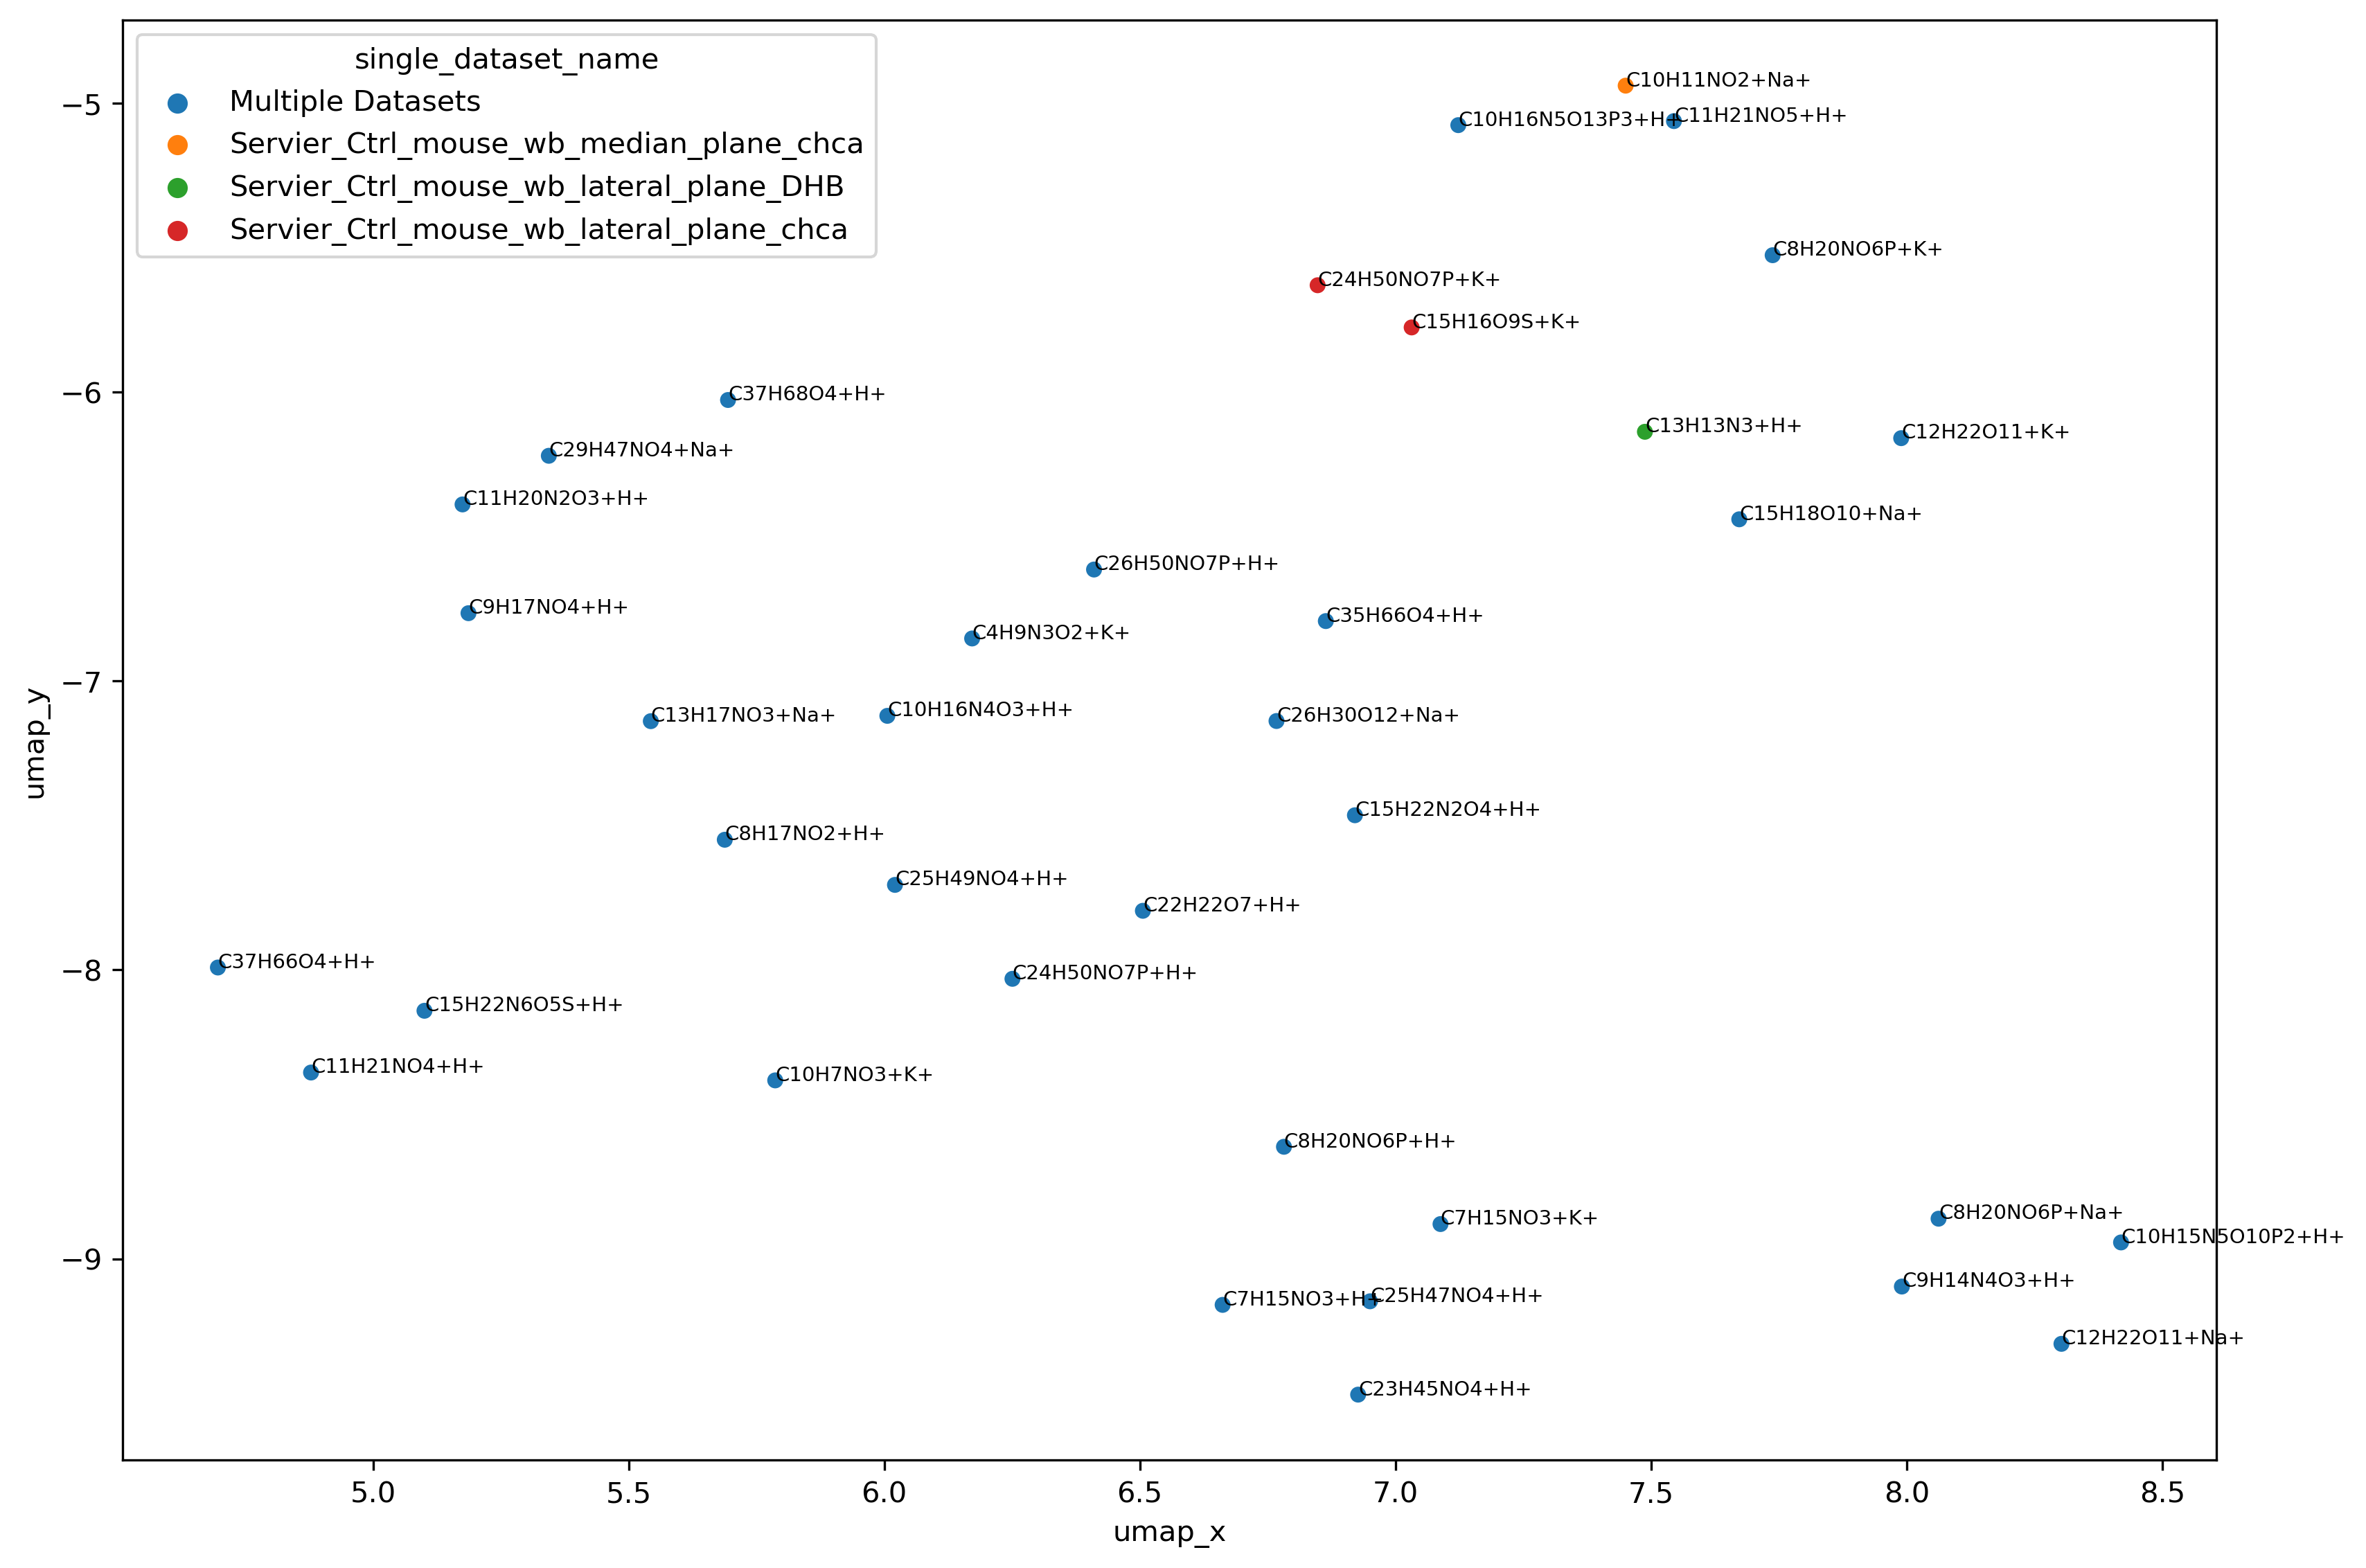

In [14]:
ax = sns.scatterplot(vec_df, x = 'umap_x', y='umap_y', hue='single_dataset_name')
label_point(vec_df['umap_x'], vec_df['umap_y'], vec_df['ion'], ax, size=7)


In [30]:
true_ids

['2017-07-24_19h42m31s',
 '2017-07-26_18h25m14s',
 '2017-08-03_15h09m51s',
 '2017-08-11_07h59m58s',
 '2017-08-03_15h09m06s']

In [33]:
for df in df_dict.values():
    updated_list = [ion_ds_list.remove(ds_id) for ion_ds_list in df['dataset_ids'] for ds_id in ion_ds_list if ds_id not in true_ids]
#    df['dataset_ids'] = []

In [35]:
df_dict['w1']

,ion,formula,adduct,ionFormula,mol_name,super_class,class,sub_class,dataset_ids,encoded_ds,ds_names,single_dataset_id,single_dataset_name,umap_x,umap_y
0,C10H14O4S-H-,C10H14O4S,-H,C10H13O4S,(2-methyl-3-phenylpropoxy)sulfonic acid,Organic acids and derivatives,Organic sulfuric acids and derivatives,Arylsulfates,"[2017-07-26_18h25m14s, 2017-07-24_19h42m31s]","[0, 0, 0, 1, 1, 0, 0, 0]","[Servier_Ctrl_mouse_wb_median_plane_9aa, Servi...",Multiple Datasets,Multiple Datasets,12.621531,0.599776
1,C6H12O6+Cl-,C6H12O6,+Cl,C6H12O6Cl,allo-inositol,Organic oxygen compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates,"[2017-07-26_18h25m14s, 2017-07-24_19h42m31s]","[0, 0, 0, 1, 1, 0, 0, 0]","[Servier_Ctrl_mouse_wb_median_plane_9aa, Servi...",Multiple Datasets,Multiple Datasets,10.913838,-0.672950
2,C13H22O4-H-,C13H22O4,-H,C13H21O4,2-Carboxy-4-dodecanolide,Organoheterocyclic compounds,Lactones,Gamma butyrolactones,"[2017-07-26_18h25m14s, 2017-07-24_19h42m31s]","[0, 0, 0, 1, 1, 0, 0, 0]","[Servier_Ctrl_mouse_wb_median_plane_9aa, Servi...",Multiple Datasets,Multiple Datasets,12.189404,-0.409059
3,C10H14N5O7P-H-,C10H14N5O7P,-H,C10H13N5O7P,2-hydroxy-dAMP,"Nucleosides, nucleotides, and analogues",Purine nucleotides,Purine ribonucleotides,"[2017-07-26_18h25m14s, 2017-07-24_19h42m31s]","[0, 0, 0, 1, 1, 0, 0, 0]","[Servier_Ctrl_mouse_wb_median_plane_9aa, Servi...",Multiple Datasets,Multiple Datasets,10.938384,-0.845601
4,C6H14O12P2-H-,C6H14O12P2,-H,C6H13O12P2,"1D-Myo-inositol 1,4-bisphosphate",Organic oxygen compounds,Organooxygen compounds,Alcohols and polyols,"[2017-07-26_18h25m14s, 2017-07-24_19h42m31s]","[0, 0, 0, 1, 1, 0, 0, 0]","[Servier_Ctrl_mouse_wb_median_plane_9aa, Servi...",Multiple Datasets,Multiple Datasets,11.526353,-0.304292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,C10H11NO2+Na+,C10H11NO2,+Na,C10H11NO2Na,"N,N-dimethylindoliumolate",Organoheterocyclic compounds,Indoles and derivatives,Hydroxyindoles,[2017-08-03_15h09m06s],"[0, 0, 0, 0, 0, 1, 0, 0]",[Servier_Ctrl_mouse_wb_median_plane_chca],2017-08-03_15h09m06s,Servier_Ctrl_mouse_wb_median_plane_chca,13.923504,1.664789
102,C21H22O5+H+,C21H22O5,+H,C21H23O5,"3-(2-hydroxy-4-methoxyphenyl)-8,8-dimethyl-2H,...",Phenylpropanoids and polyketides,2-arylbenzofuran flavonoids,NaN,[2017-08-03_15h09m06s],"[0, 0, 0, 0, 0, 1, 0, 0]",[Servier_Ctrl_mouse_wb_median_plane_chca],2017-08-03_15h09m06s,Servier_Ctrl_mouse_wb_median_plane_chca,14.065865,1.824885
103,C12H20N2O3+H+,C12H20N2O3,+H,C12H21N2O3,Pirbuterol,Organoheterocyclic compounds,Pyridines and derivatives,Hydroxypyridines,[2017-08-03_15h09m06s],"[0, 1, 0, 0, 0, 1, 0, 0]","[Servier_Ctrl_mouse_wb_median_plane_chca, wb x...",Multiple Datasets,Multiple Datasets,13.682630,1.427951
104,C21H36O3+H+,C21H36O3,+H,C21H37O3,"3,4-Dimethyl-5-pentyl-2-furandecanoic acid",Lipids and lipid-like molecules,Steroids and steroid derivatives,Pregnane steroids,[2017-08-03_15h09m06s],"[0, 1, 1, 0, 0, 1, 0, 0]","[Servier_Ctrl_mouse_wb_median_plane_chca, whol...",Multiple Datasets,Multiple Datasets,13.853247,1.612284
